# Projeto de Portfólio: Visualização de Dados de Imigração (Canadá)

Neste projeto, eu analiso dados de imigração para o Canadá (1980 a 2013) e construo visualizações com **Matplotlib**, **Seaborn** e **Plotly**. A ideia aqui não é apenas “plotar gráficos”, mas mostrar meu processo:

- **Preparação e organização dos dados**
- **Construção de gráficos estáticos (Matplotlib)**
- **Refinamento visual e storytelling (customizações, anotações e destaque de insights)**
- **Visualizações com estilo e temas (Seaborn)**
- **Gráficos interativos para exploração (Plotly)**

Ao final, também deixo exemplos de como **exportar** as visualizações (PNG/HTML) para uso em relatórios e apresentações.

## 1) Entendimento do conjunto de dados

O dataset contém o volume de imigrantes por **país de origem** ao longo dos anos (1980–2013), além de campos de categorização como continente e região.

Nesta etapa eu:

- Carrego os dados
- Verifico estrutura e tipos
- Organizo as colunas de anos para facilitar a análise temporal

### Importando os dados

In [88]:
import pandas as pd

In [89]:
from pathlib import Path
# Intrução para carregar o arquivo:
# - Coloque o arquivo `imigrantes_canada.csv` na mesma pasta deste notebook
# - Se estiver no Colab, você pode manter o arquivo em /content

csv_local = Path('imigrantes_canada.csv')
csv_colab = Path('/content/imigrantes_canada.csv')

if csv_local.exists():
    df = pd.read_csv(csv_local)
elif csv_colab.exists():
    df = pd.read_csv(csv_colab)
else:
    raise FileNotFoundError(
        'Arquivo imigrantes_canada.csv não encontrado. ' 
        'Coloque-o na mesma pasta do notebook ou em /content (Colab).'
    )

In [90]:
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

###Realizando alguns tratamentos

In [92]:
df.set_index('País', inplace=True)

In [93]:
anos = list(map(str, range(1980, 2014)))

In [94]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Extraindo a série de dados para o Brasil

In [95]:
brasil = df.loc['Brasil', anos]

In [96]:
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brasil, dtype: object

In [97]:
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [98]:
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


##**Criando o primeiro gráfico com Matplotlib** 

> Documentação da biblioteca: https://matplotlib.org/

In [99]:
import matplotlib.pyplot as plt

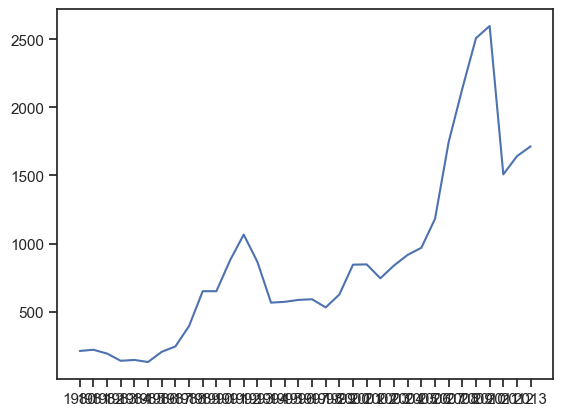

In [100]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])

### Escolhendo quais anos aparecerem no eixo X com `plt.xticks`

([<matplotlib.axis.XTick at 0x1945f6111d0>,
 [Text(0.0, 0, '1980'),
  Text(5.0, 0, '1985'),
  Text(10.0, 0, '1990'),
  Text(15.0, 0, '1995'),
  Text(20.0, 0, '2000'),
  Text(25.0, 0, '2005'),
  Text(30.0, 0, '2010')])

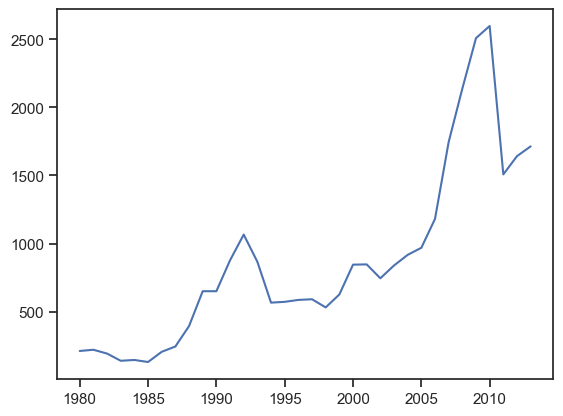

In [101]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])

### Alterando os ticks do eixo Y com `plt.yticks`

([<matplotlib.axis.YTick at 0x1945f65e990>,
 [Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000')])

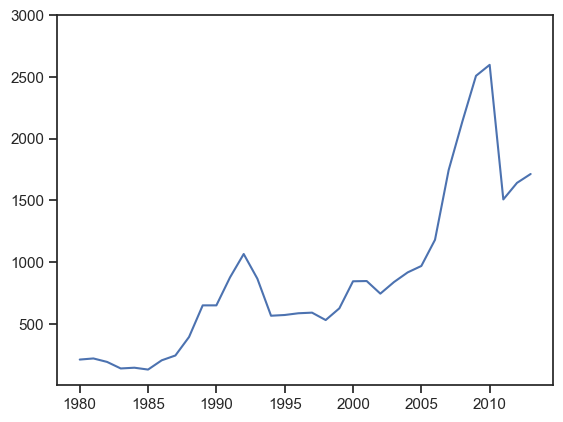

In [102]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])

###Exibindo gráfico com `plt.show()`

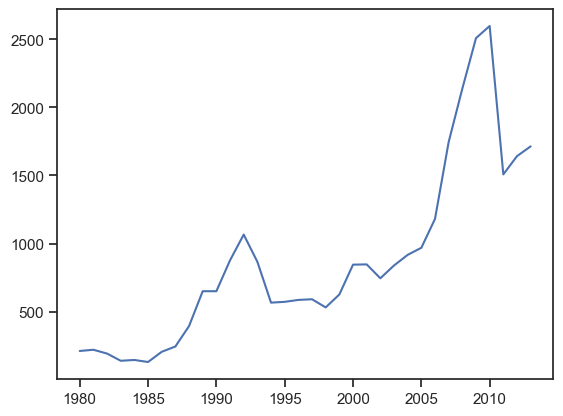

In [103]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

### Modificando o tamanho do gráfico com a função `plt.figure()`

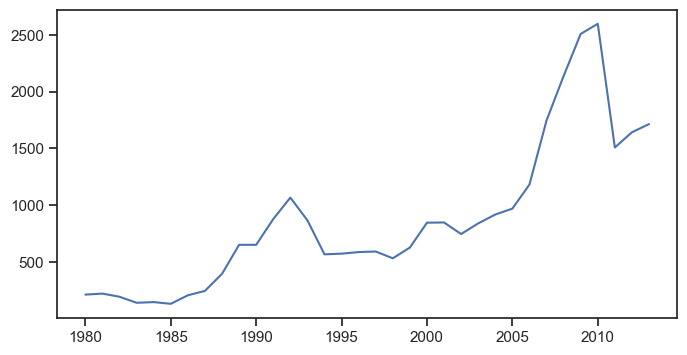

In [104]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

##**Adicionando títulos e rótulos com Matplotlib**

### Adicionando título com `plt.title()`





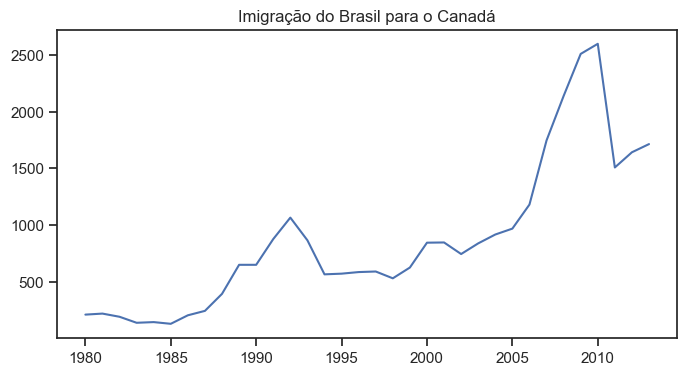

In [105]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

### Adicionando rótulos aos eixos X e Y usando `plt.xlabel()` e `plt.ylabel()`


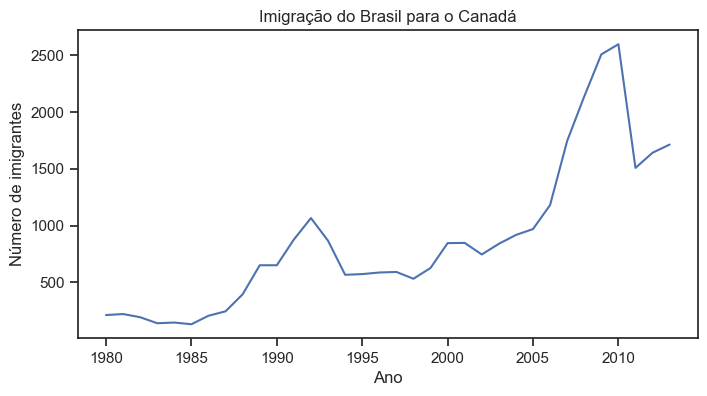

In [106]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

# 2) Matplotlib: construção do gráfico e primeiros ajustes

Aqui eu uso o **Matplotlib** para construir visualizações estáticas e entender como controlar:

- Tamanho da figura
- Ticks (frequência/posição)
- Títulos e rótulos
- Subplots para comparar países

##**Criando uma figura**

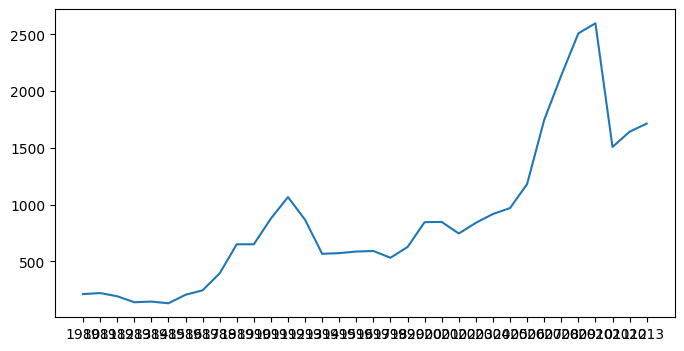

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.show()

### Ajustando a frequência dos rótulos do eixo X

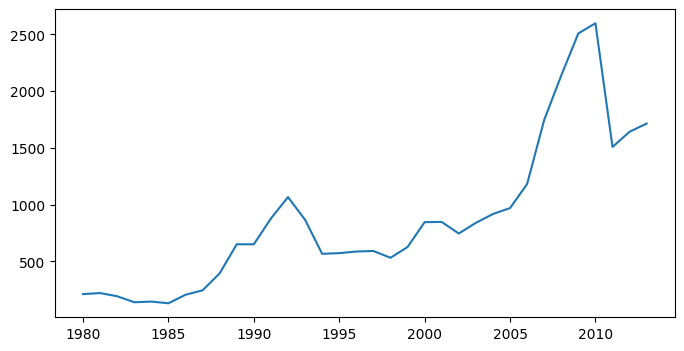

In [21]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

##**Adicionando títulos e rótulos em figuras**

### Adicionando título 

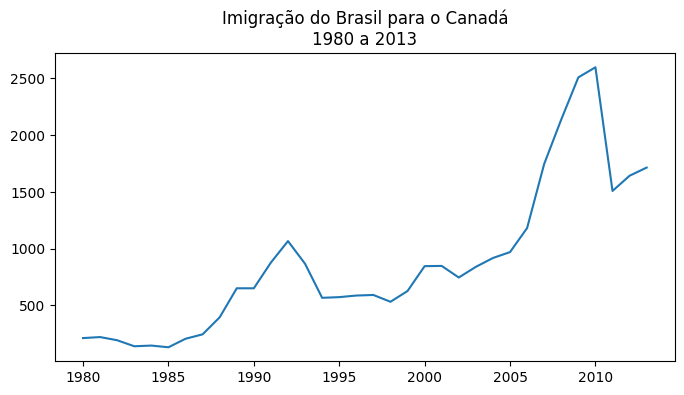

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

### Adicionando rótulos

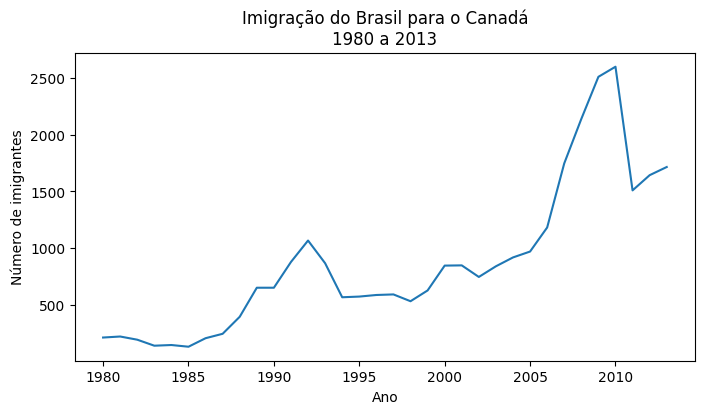

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
ax.set_ylabel('Número de imigrantes')
ax.set_xlabel('Ano')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

##**Criando subplots em uma direção**



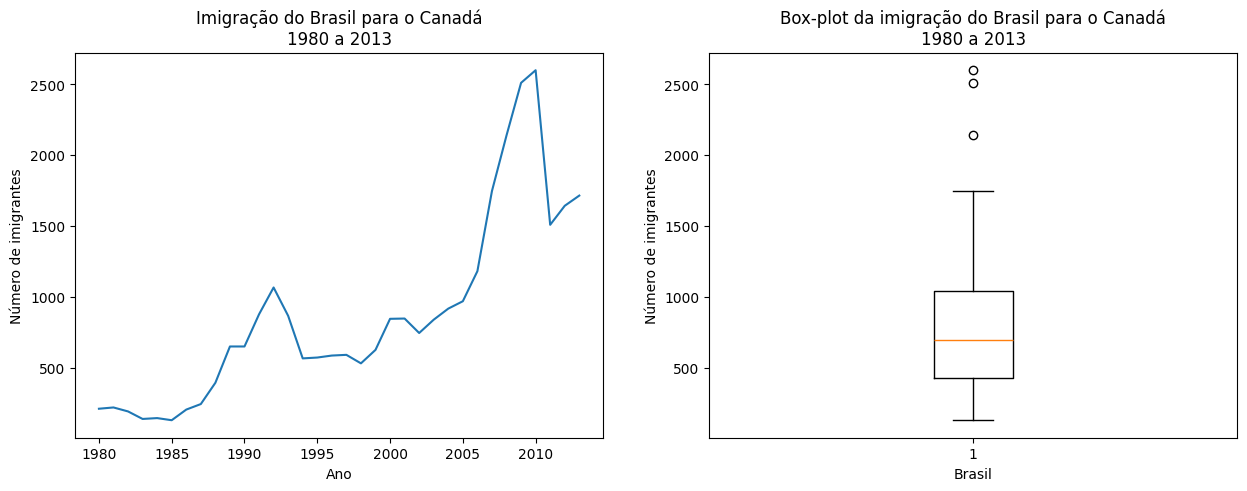

In [24]:
# Criando a figura
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Subplot 1: Gráfico de linhas
axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))

# Subplot 2: Boxplot
axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Box-plot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')

plt.show()

### Adicionando grid para entender melhor os valores

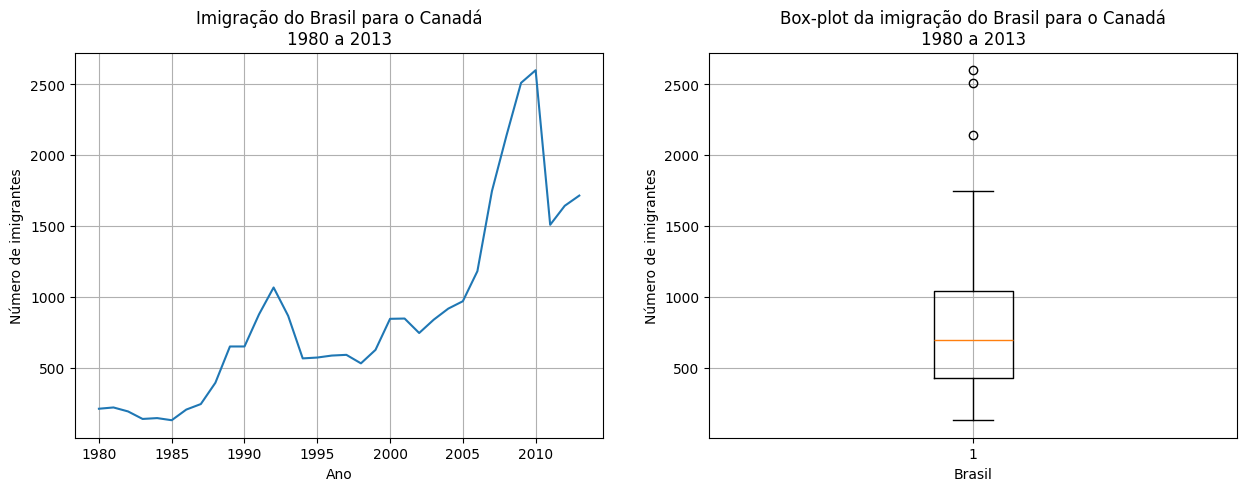

In [25]:
# Criando a figura
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Subplot 1: Gráfico de linhas
axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid() 

# Subplot 2: Boxplot
axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Box-plot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()

plt.show()

In [26]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


##**Criando subplots em duas direções**

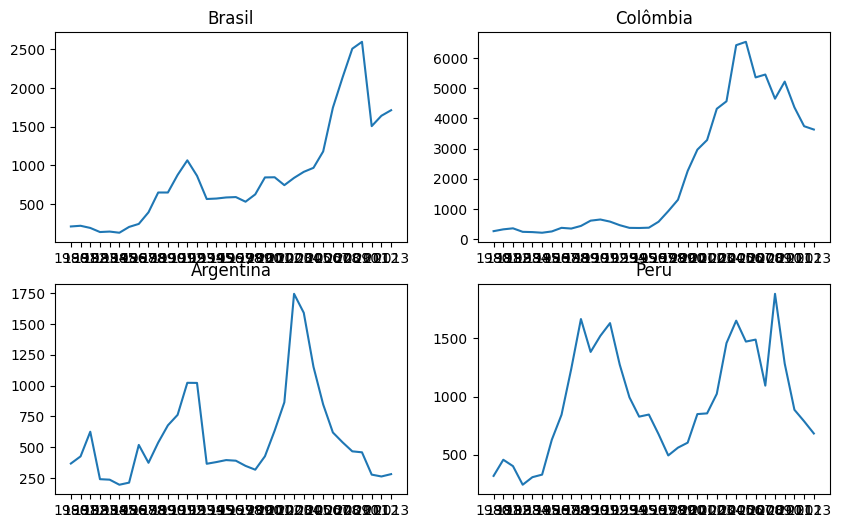

In [27]:
# Criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

plt.show()

### Ajustando o espaçamento


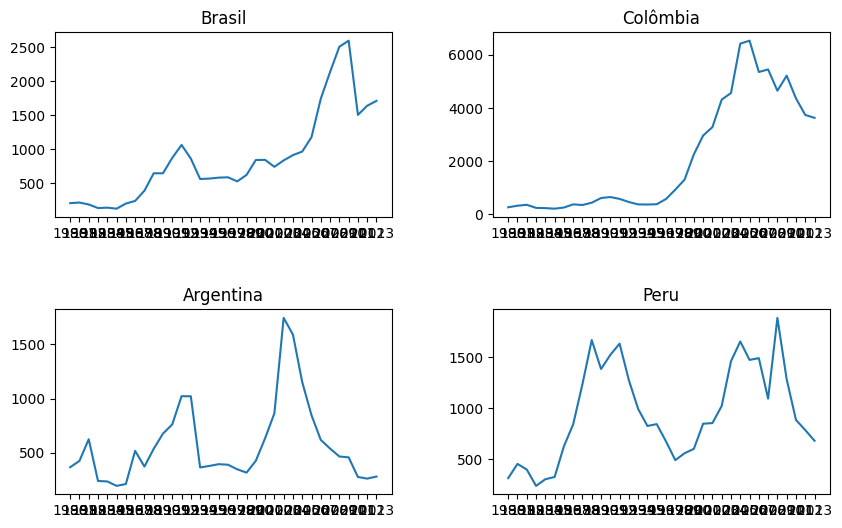

In [28]:
# Criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

plt.show()

### Alterando a frequência dos ticks do eixo X em todos os subplots

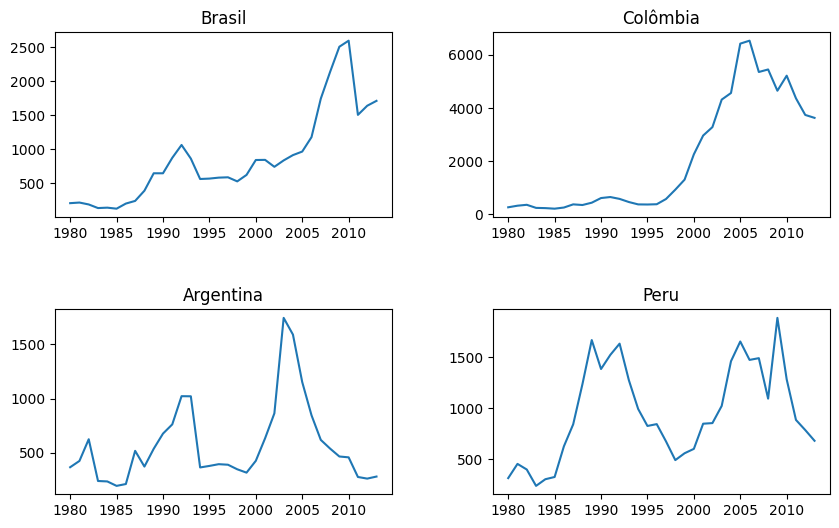

In [29]:
# Criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

# Alterando a frequência dos ticks do eixo X em todos os subplots
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.show()

### Adicionando rótulos para os eixos X e Y

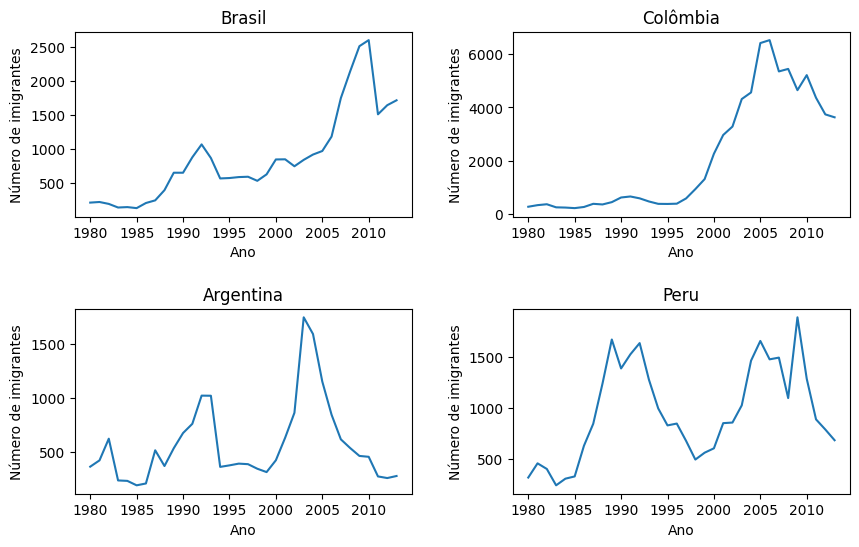

In [30]:
# Criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

# Alterando a frequência dos ticks do eixo X em todos os subplots
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Adicionando rótulos para os eixos X e Y
for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

plt.show()

### Definindo a mesma escala no eixo Y em todos os subplots



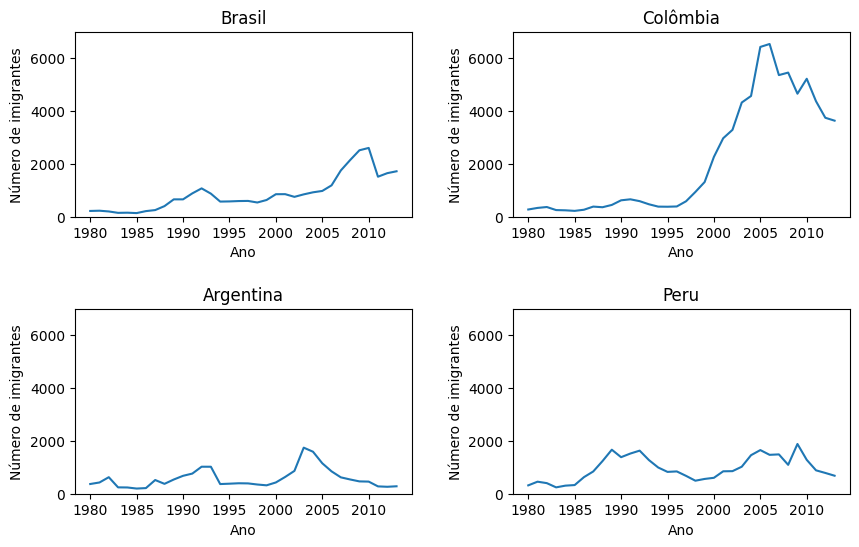

In [31]:
# Criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

# Alterando a frequência dos ticks do eixo X em todos os subplots
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Adicionando rótulos para os eixos X e Y
for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

# Definindo a mesma escala no eixo Y em todos os subplots
ymin = 0
ymax = 7000
for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)

plt.show()

### Adicionando um título geral



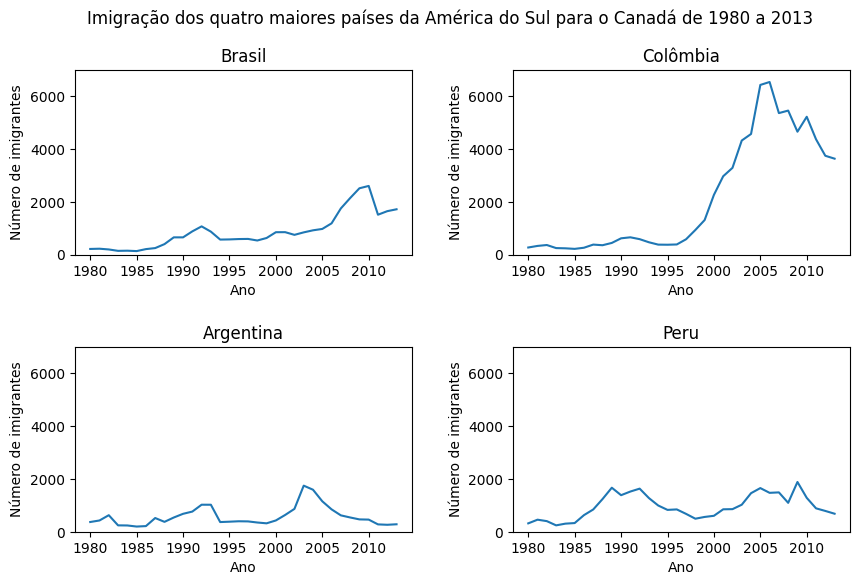

In [32]:
# Criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Adicionando um título geral para os subplots
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

# Alterando a frequência dos ticks do eixo X em todos os subplots
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Adicionando rótulos para os eixos X e Y
for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

# Definindo a mesma escala no eixo Y em todos os subplots
ymin = 0
ymax = 7000
for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)

plt.show()

# 3) Matplotlib: refinamento visual e storytelling

Depois de ter o gráfico funcionando, eu foco em **legibilidade** e **comunicação**. Nesta parte eu ajusto:

- Tipografia (tamanho e hierarquia)
- Estilo do grid e elementos de apoio
- Paletas e contraste
- Destaque do Brasil para evidenciar um insight
- Anotações com valores e limpeza de “ruído visual” (frame, ticks, eixos)

##**Personalizando visualizações com Matplotlib**

### Alterando o tamanho das fontes

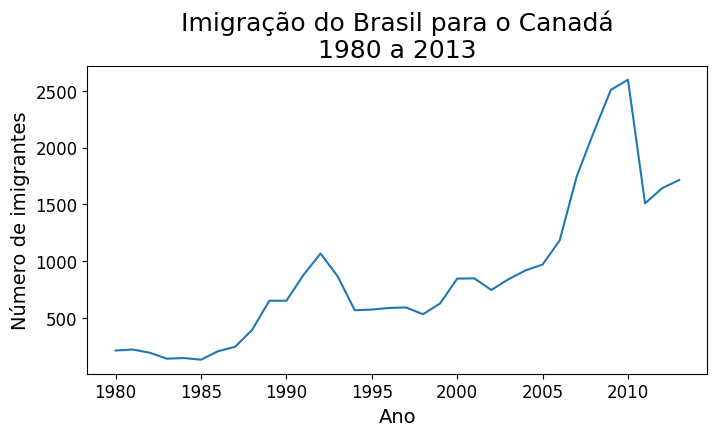

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

### Mudando a posição do título

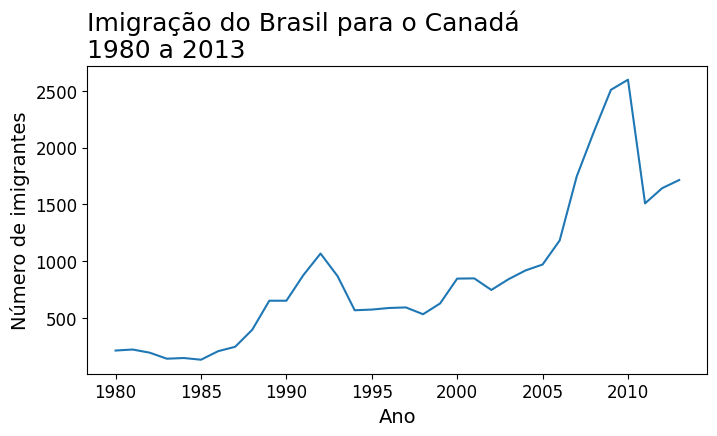

In [34]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

### Mudando a espessura da linha 

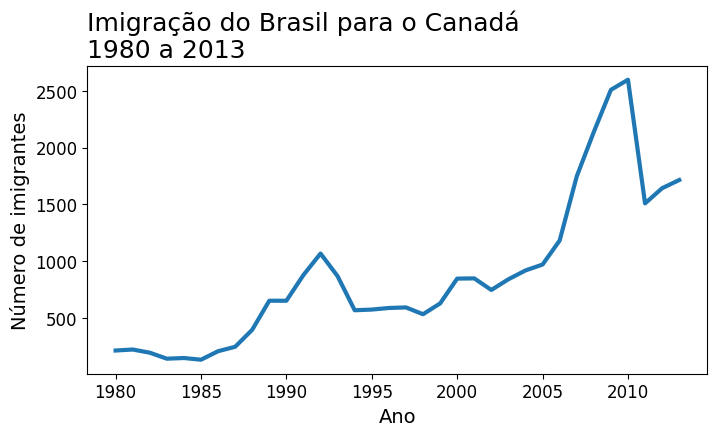

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

###Adicionando marcadores

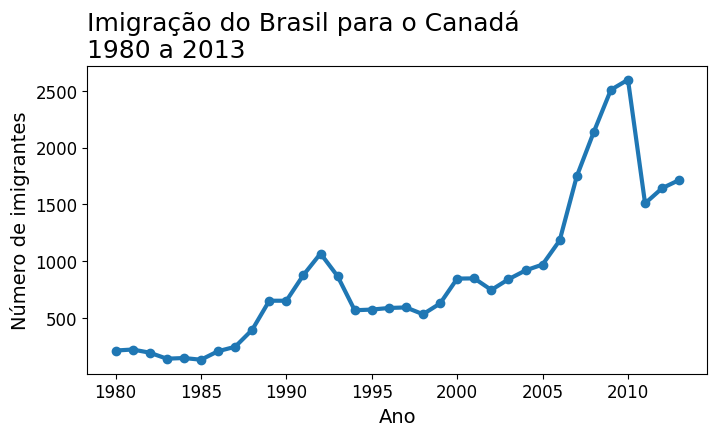

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker='o')
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

### Adicionando grid

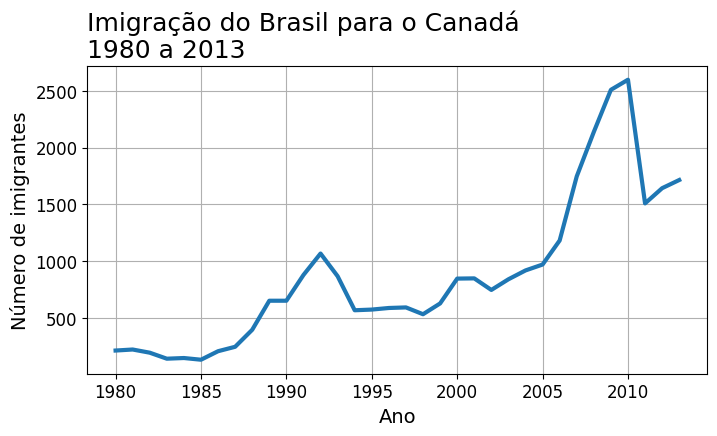

In [37]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid()
plt.show()

###Mudando o estilo do grid

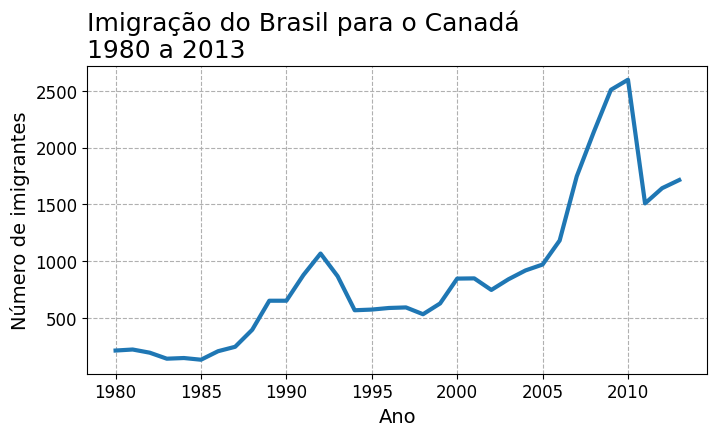

In [38]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--')
plt.show()

##**Alterando as cores**

> As cores podem ser encontradas em: https://matplotlib.org/stable/gallery/color/named_colors.html

### Mudando apenas uma cor

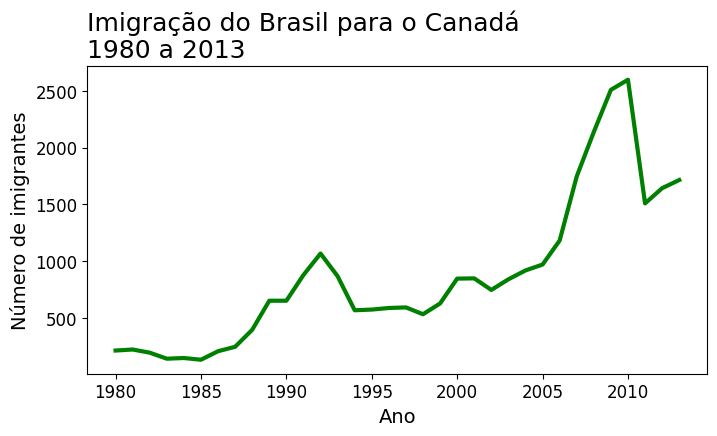

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, color='g')
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

### Mudando várias cores

In [40]:
america_sul = df.query('Região == "América do Sul"')

In [41]:
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


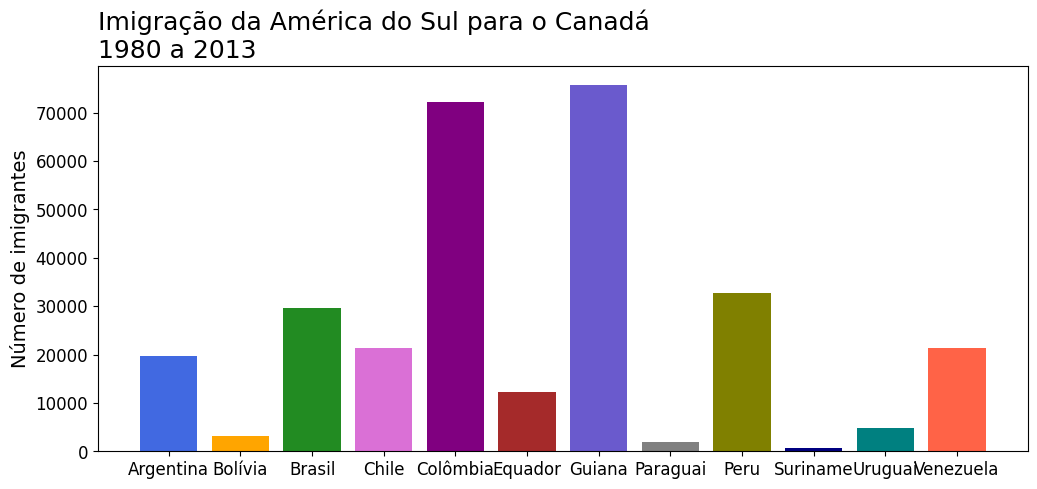

In [42]:
# Lista de cores
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(america_sul.index, america_sul['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

### Deixando o gráfico na horizontal

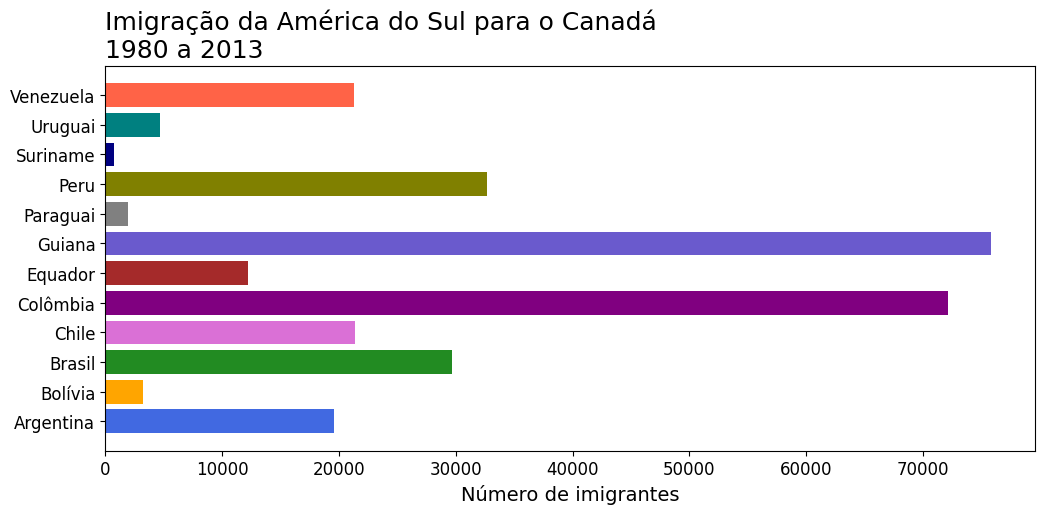

In [43]:
# Lista de cores
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul.index, america_sul['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

### Deixando as barras do maior para o menor valor

In [44]:
america_sul_sorted = america_sul.sort_values(by='Total', ascending=True)

In [45]:
america_sul_sorted 

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Suriname,América Latina e o Caribe,América do Sul,15,10,21,12,5,16,7,46,...,15,16,20,9,12,13,11,16,4,739
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Uruguai,América Latina e o Caribe,América do Sul,128,132,146,105,90,92,137,269,...,217,175,147,160,99,93,81,47,58,4715
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Venezuela,América Latina e o Caribe,América do Sul,103,117,174,124,142,165,179,229,...,1211,1192,1335,1239,1353,998,1452,1373,1022,21267
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659


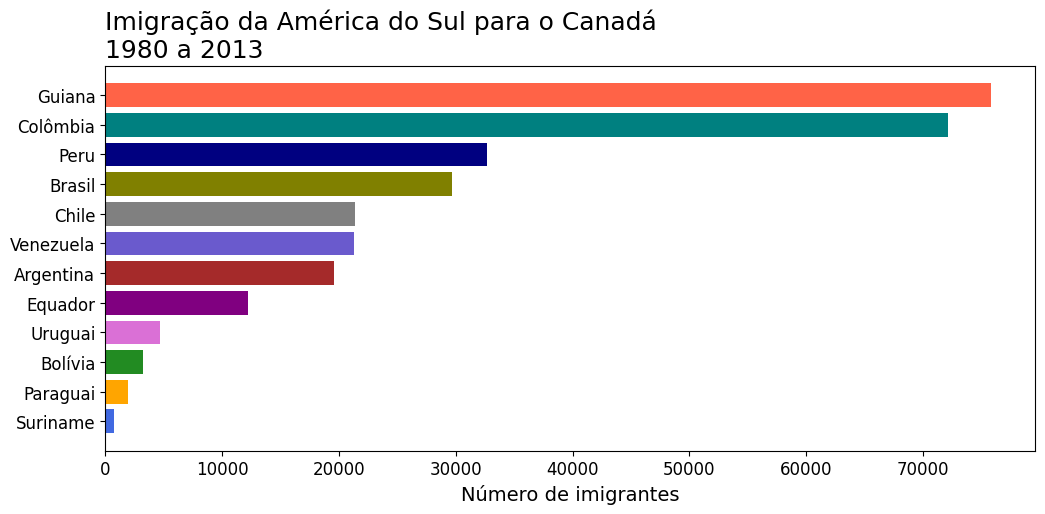

In [46]:
# Lista de cores
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

### Destacacando informações

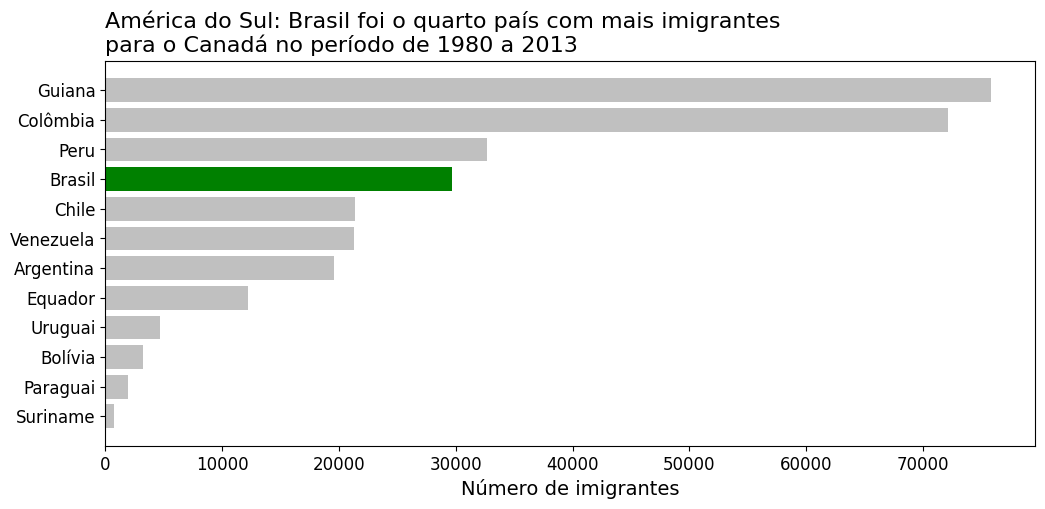

In [47]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura 
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

##**Adicionando anotações**

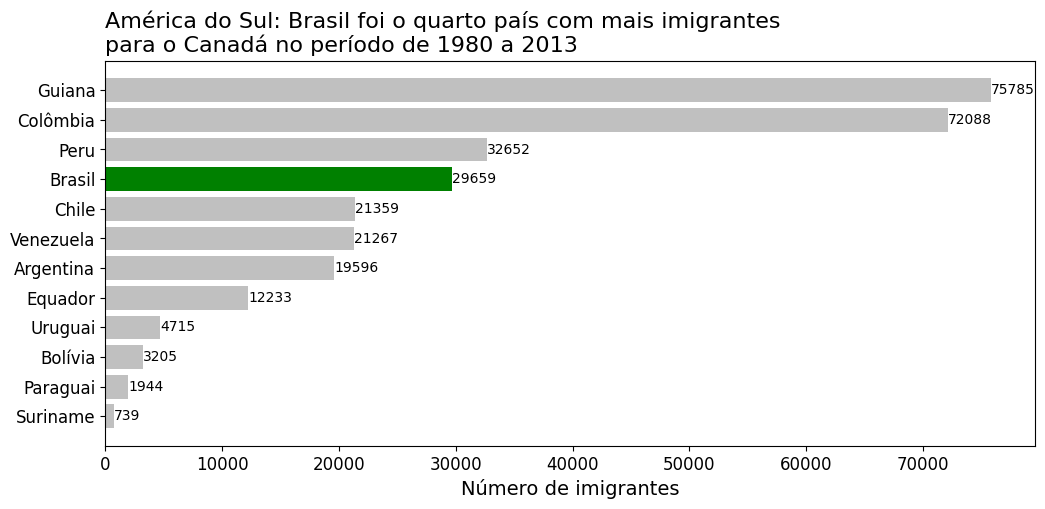

In [48]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar o valor máximo de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

plt.show()

###Retirando o frame

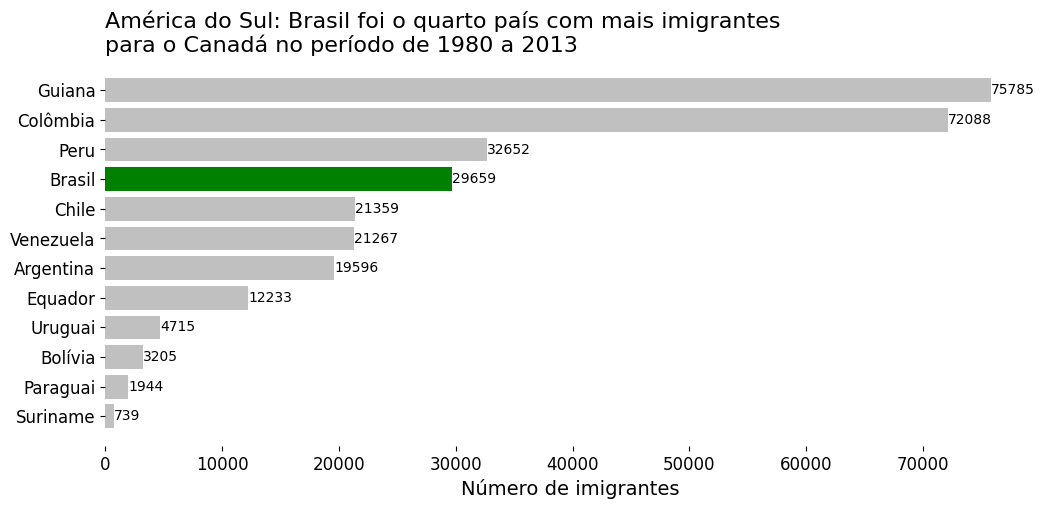

In [49]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar o valor máximo de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

plt.show()

### Retirando o eixo X

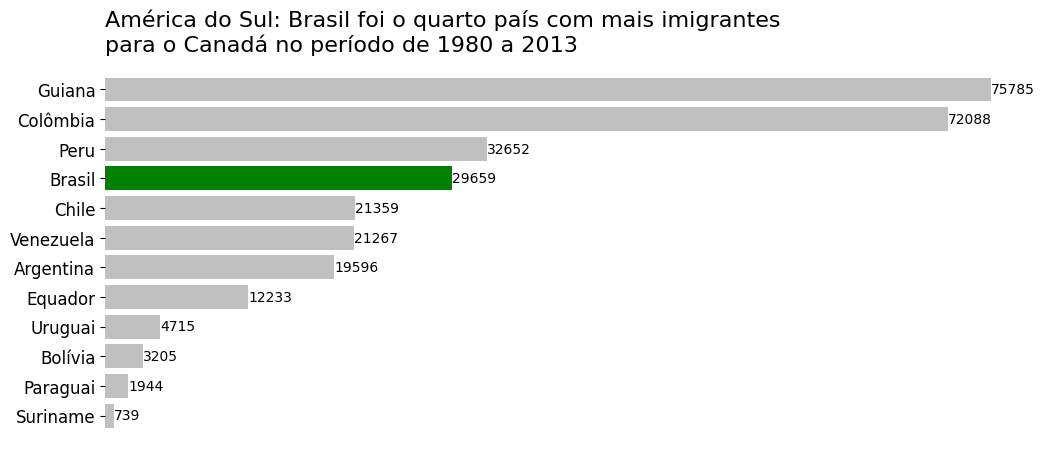

In [50]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar o valor máximo de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False) 

plt.show()

### Retirando os ticks ao lado do nome dos países:


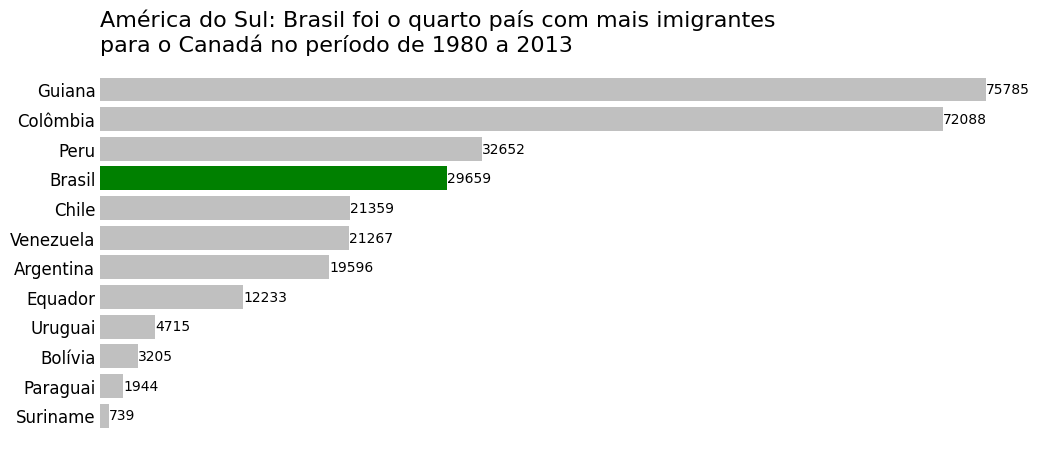

In [51]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar o valor máximo de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False) 

# Removendo todos os ticks dos eixos X e Y
ax.tick_params(axis='both', which='both', length=0)

plt.show()

##**Salvando gráficos**

In [52]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


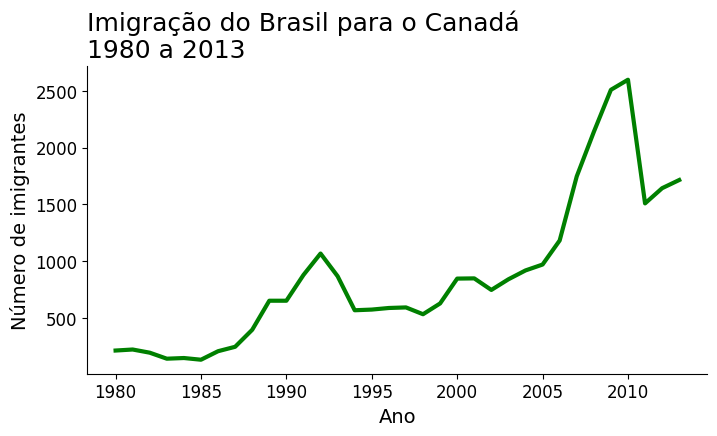

In [53]:
# Figura com as tendências de imigração do Brasil para o Canadá
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, color='g')
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Salvando a figura 
fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

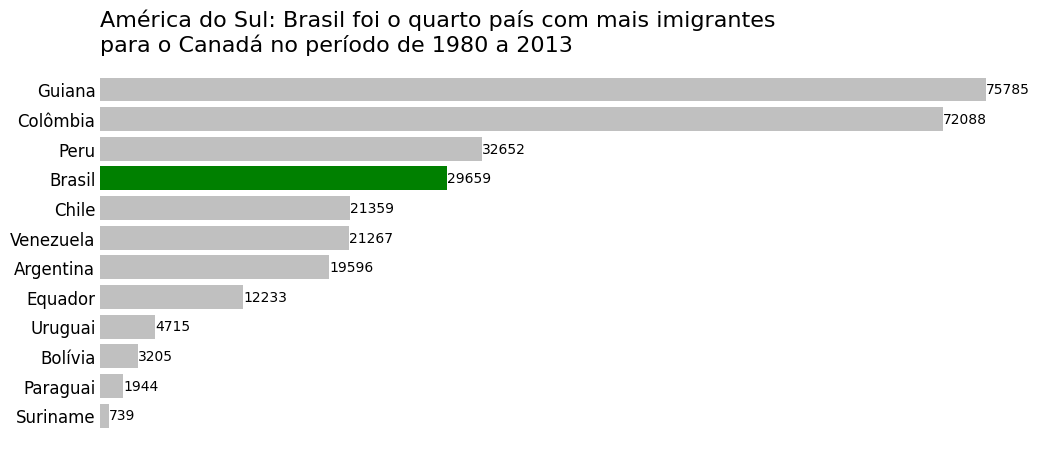

In [54]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar o valor máximo de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False) 

# Removendo todos os ticks dos eixos X e Y
ax.tick_params(axis='both', which='both', length=0)

# Salvando a figura
fig.savefig('imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

# 4) Seaborn: gráficos com tema e consistência visual

O **Seaborn** acelera a criação de gráficos com estética consistente e facilita trabalhar com:

- Temas (dark/whitegrid/ticks)
- Paletas (sequenciais, divergentes e categóricas)
- Ajustes rápidos de layout e *despine*

Nesta etapa eu monto um ranking com os 10 países com maior imigração total no período.

##**Criando o primeiro gráfico com Seaborn**

In [55]:
import seaborn as sns

In [56]:
sns.set_theme()

In [57]:
top_10 = df.sort_values(by='Total', ascending=False).head(10)

In [58]:
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


<Axes: xlabel='País', ylabel='Total'>

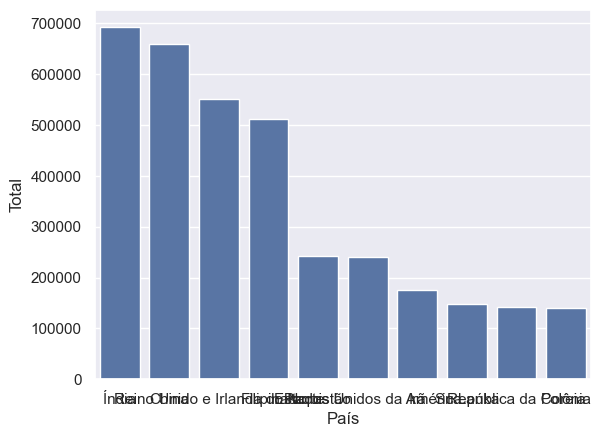

In [59]:
sns.barplot(data=top_10, x=top_10.index, y='Total')

### Deixando o gráfico de barras na horizontal

<Axes: xlabel='Total', ylabel='País'>

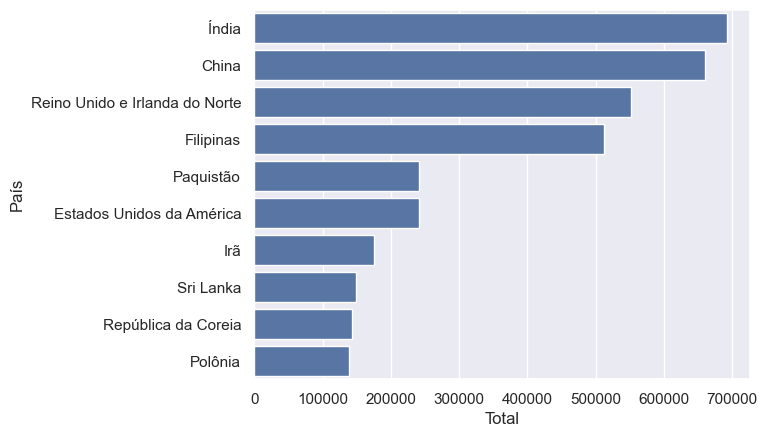

In [60]:
sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

##**Personalizando visualizações com Seaborn**

###Adicionando título e rótulos nos eixos

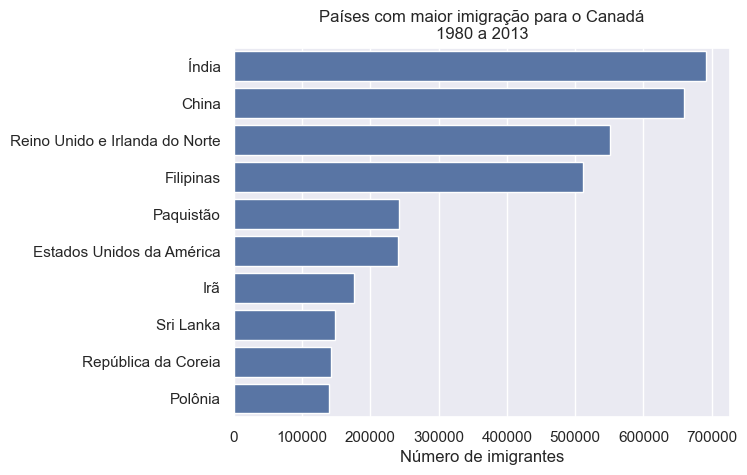

In [61]:
# Criando o gráfico com as barras na horizontal
ax=sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

# Adicionando título, rótulos nos eixos 
ax.set(title='Países com maior imigração para o Canadá\n1980 a 2013',
       xlabel='Número de imigrantes',
       ylabel='')

# Exibindo o gráfico
plt.show()

###Criando uma figura e alterando tamanho das fontes

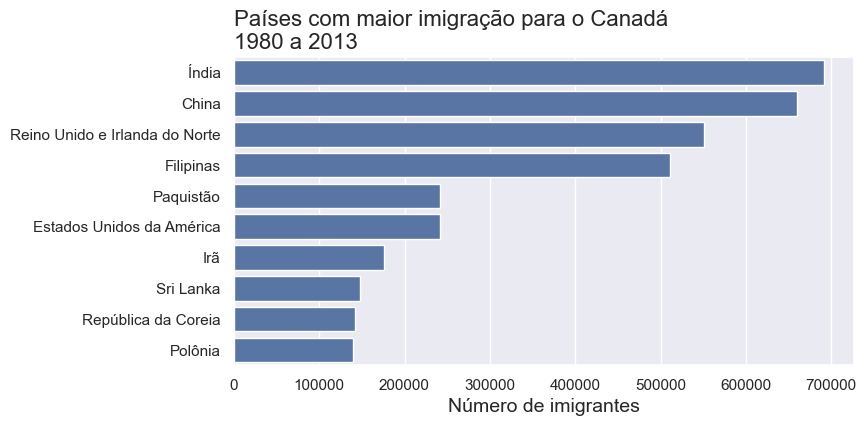

In [62]:
# Criando a figura
fig, ax = plt.subplots(figsize=(8,4))
ax=sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

# Personalizando o gráfico
ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')

# Exibindo o gráfico
plt.show()

##**Alterando as cores com paletas**
> As paletas podem ser encontradas aqui: https://seaborn.pydata.org/tutorial/color_palettes.html



### Criando função para gerar o gráfico e testar diferentes paletas de cores

In [63]:
def gerar_grafico_paleta(palette):
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
    ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
    ax.set_xlabel('Número de imigrantes', fontsize=14)
    ax.set_ylabel('')
    plt.show()

### Paleta de cores sequencial



C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


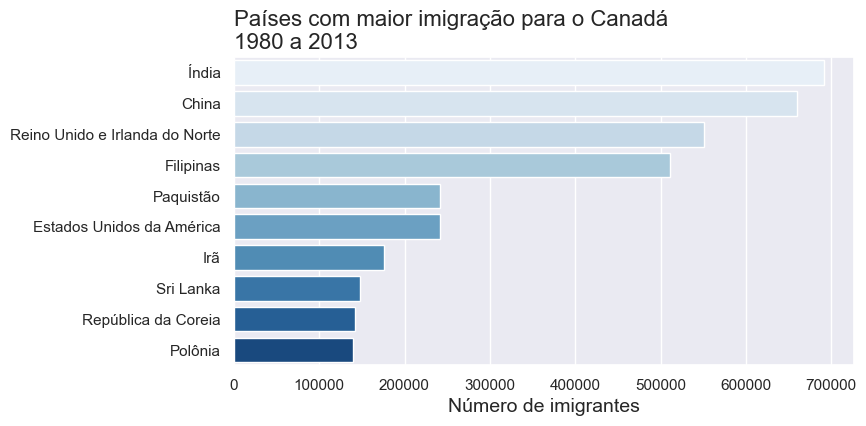

In [64]:
gerar_grafico_paleta('Blues')

#### Invertendo o gradiente

C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


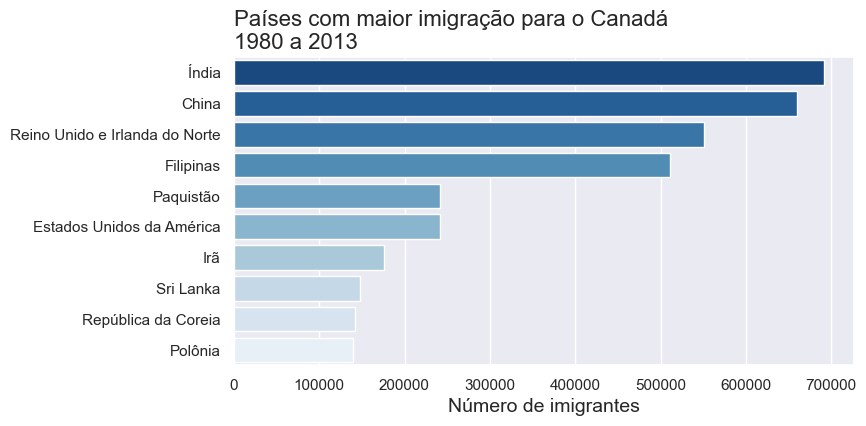

In [65]:
gerar_grafico_paleta('Blues_r')

### Paleta de cores divergente


C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


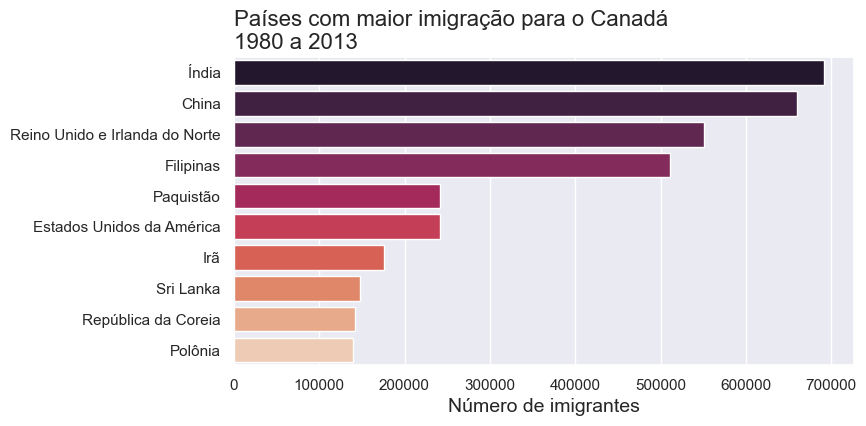

In [66]:
gerar_grafico_paleta('rocket')

C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


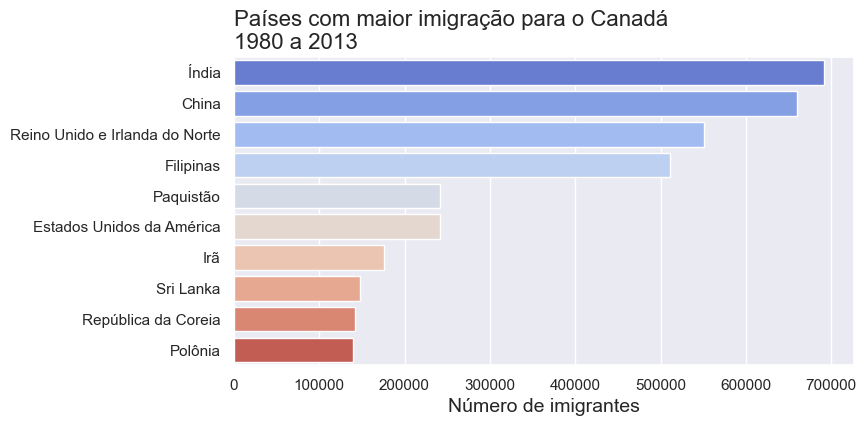

In [67]:
gerar_grafico_paleta('coolwarm')

### Paleta de cores categórica


C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


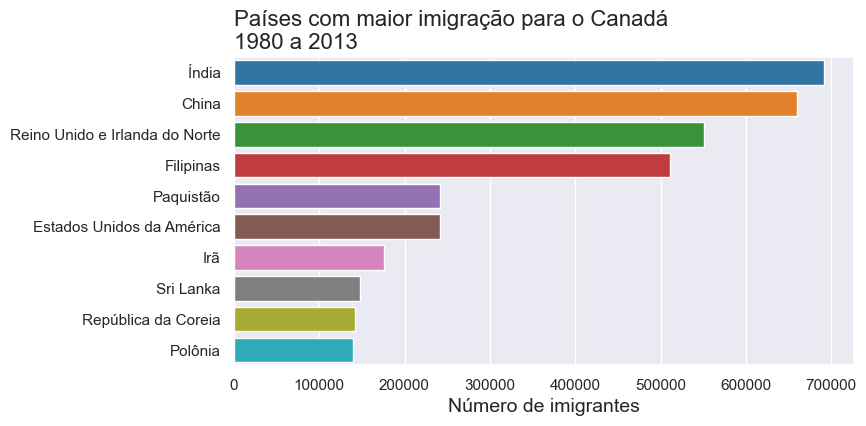

In [68]:
gerar_grafico_paleta('tab10')

##**Explorando temas**

### dark 

C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


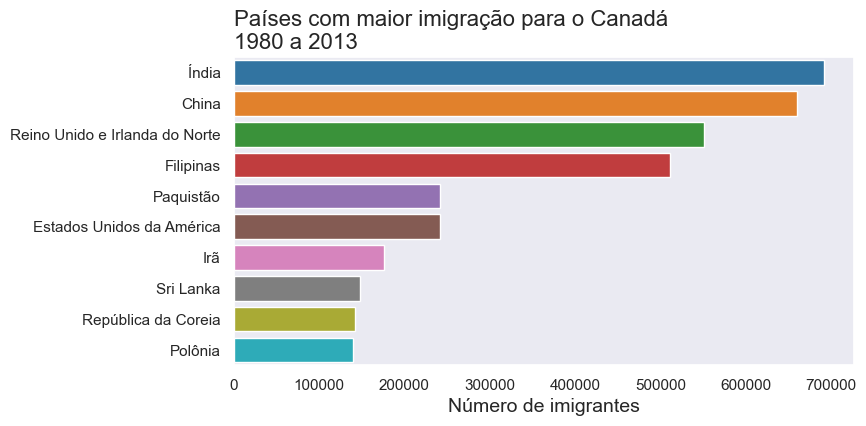

In [69]:
# Alterando o tema
sns.set_theme(style='dark')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

### whitegrid 

C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


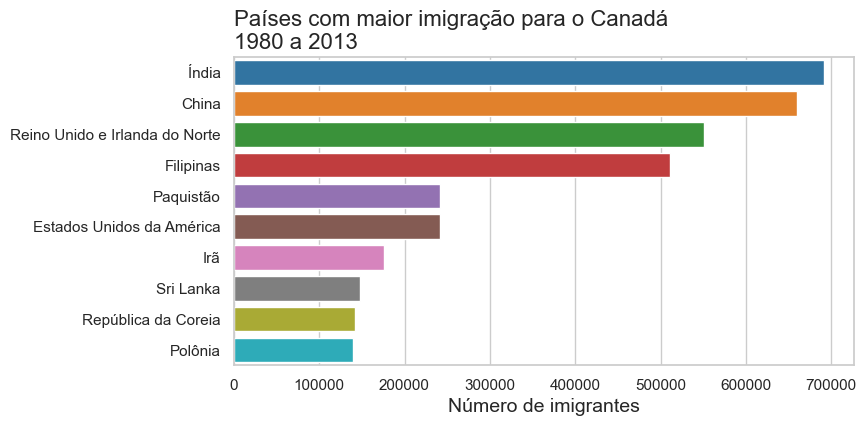

In [70]:
# Alterando o tema
sns.set_theme(style='whitegrid')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

### white 

C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


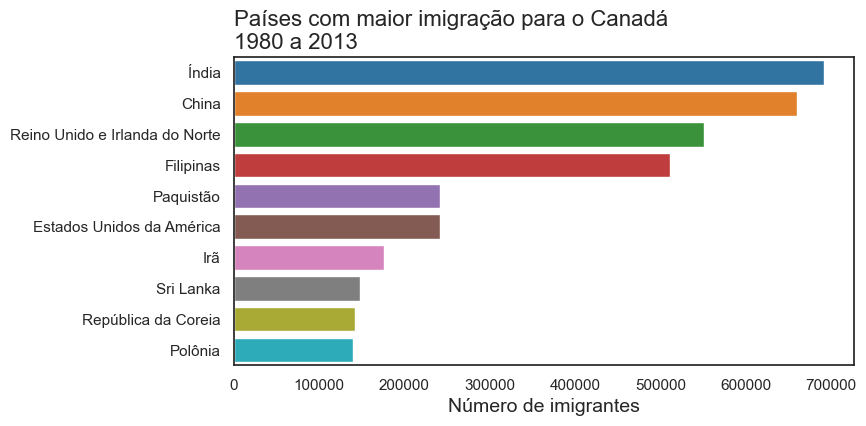

In [71]:
# Alterando o tema
sns.set_theme(style='white')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

### ticks 

C:\Users\David\AppData\Local\Temp\ipykernel_15764\31661818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


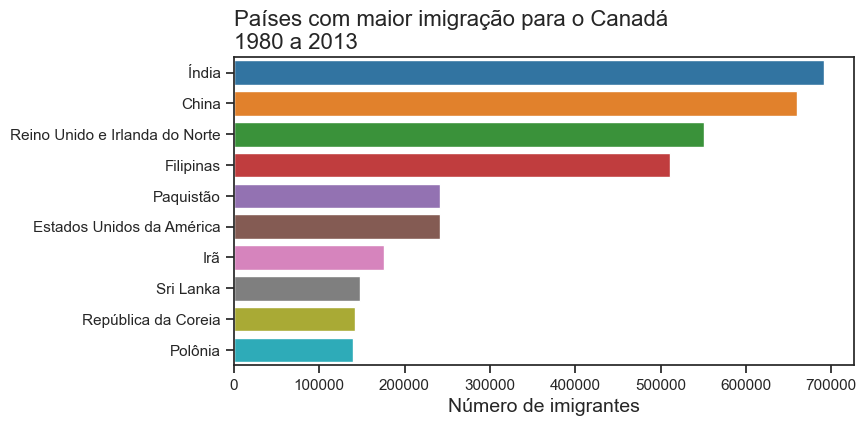

In [72]:
# Alterando o tema
sns.set_theme(style='ticks')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

### sns.despine()

C:\Users\David\AppData\Local\Temp\ipykernel_15764\4117548906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')


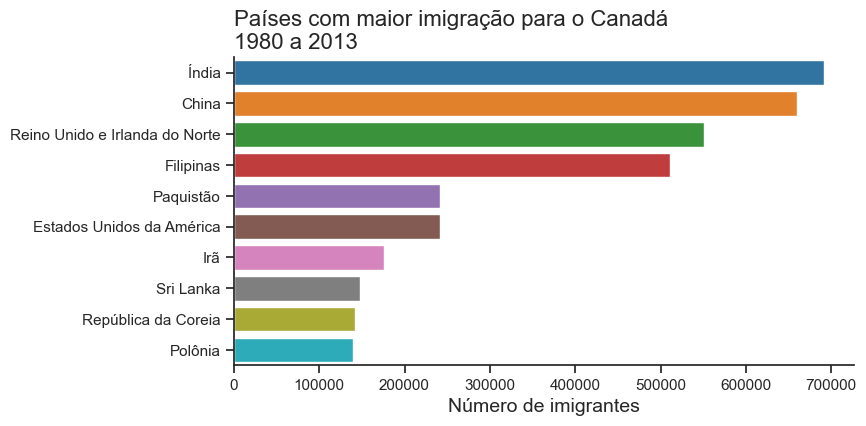

In [73]:
#Criando a figura
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')

# Personalizando
ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
sns.despine()

plt.show()

# 5) Plotly: exploração interativa

Por fim, eu uso **Plotly Express** para construir gráficos interativos.

O objetivo aqui é permitir que a pessoa que está explorando o resultado:

- Passe o mouse e veja valores
- Dê zoom em trechos do tempo
- Compare séries com mais facilidade

Também deixo um exemplo de exportação em **HTML**, útil para publicar em portfólio ou anexar em relatórios.

##**Criando o primeiro gráfico com Plotly**





In [74]:
import plotly.express as px

In [75]:
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.show()

### Alterando o tamanho


In [76]:
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.update_layout(width=1000, height=500)
fig.show()

### Rotacionando os ticks

In [77]:
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.update_layout(width=1000, height=500, 
                  xaxis={'tickangle': -45})
fig.show()

##**Adicionando títulos e rótulos com Plotly**


### Adicionando título

In [78]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração dos Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(width=1000, height=500, 
                  xaxis={'tickangle': -45})
fig.show()

### Adicionando títulos aos eixos

In [79]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(
    width=1000, height=500, 
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

##**Personalizando visualizações com Plotly**


### Fonte: alterando tipo, tamanho e cor

In [80]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(
    width=1000, height=500, 
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')
fig.show()

### Alterando a cor da linha

In [81]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_traces(line_color='green', line_width=4)
fig.update_layout(
    width=1000, height=500, 
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')
fig.show()

### Alterando cores com mais de uma variável

In [82]:
america_sul.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [83]:
df_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis=1)
america_sul_final = df_america_sul_clean.T

In [84]:
america_sul_final.head()

País,Argentina,Bolívia,Brasil,Chile,Colômbia,Equador,Guiana,Paraguai,Peru,Suriname,Uruguai,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


In [85]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País', 
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

### Adicionando marcadores

In [86]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País', markers=True,
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

##**Salvando gráficos em HTML**

In [87]:
fig.write_html('imigracao_america_sul.html')

## Insights (principais achados)

### Brasil (1980–2013)

- **Tendência de alta no longo prazo**: a série mostra um crescimento consistente a partir dos anos 2000, saindo de patamares abaixo de ~1.000/ano para acima de 1.500/ano na década de 2010.
- **Pico em 2010**: o maior valor do período ocorre em **2010 (2.598 imigrantes)**.
- **Queda após o pico**: há uma redução em **2011 (1.508)**, seguida de recuperação parcial em **2012 (1.642)** e **2013 (1.714)**.
- **Variabilidade elevada**: o boxplot e o descritivo indicam dispersão considerável (**média ~872**, **mediana ~698**, **máximo 2.598**), reforçando que a imigração brasileira teve anos de forte aceleração.

### América do Sul (acumulado 1980–2013)

- **Concentração do volume em poucos países**: os totais acumulados mostram que **Guiana (75.785)** e **Colômbia (72.088)** lideram com folga, concentrando grande parte do fluxo sul-americano.
- **Brasil como 4º maior emissor**: no acumulado do período, o Brasil aparece em **4º lugar (29.659)**, atrás de **Guiana**, **Colômbia** e **Peru (32.652)**.
- **“Cauda longa” de países com baixo volume**: países como **Suriname (739)** e **Paraguai (1.944)** têm participação pequena no total regional, o que é bem representado no gráfico de barras horizontal ordenado.
- **Dinâmicas temporais diferentes entre países**: o gráfico de linhas multi-séries evidencia que os países não seguem o mesmo padrão ao longo do tempo (há países com picos mais cedo e outros com crescimento mais forte nos anos 2000).

### Observações para storytelling

- **Destaque visual funciona**: ao realçar o Brasil e ordenar as barras, fica imediata a leitura de ranking e magnitude (diferença entre líderes e os demais).
- **Interatividade (Plotly) complementa a análise**: o HTML exportado permite explorar valores por ano/país no hover, útil para apresentação e aprofundamento sem poluir o gráfico estático.
